In [1]:
# 필요한 라이브러리 loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Raw Data Loading
df = pd.read_csv('bmi.csv', skiprows=3)
display(df.head())  # DataFrame 생성 확인
print(df.shape)  # (20000, 3) 행과 열의 개수 확
df.info()  # 결측치 없어요. 각 컬럼의 데이터 타입도 정상!

,label,height,weight
0,1,188,71
1,2,161,68
2,0,178,52
3,2,136,63
4,1,145,52


(20000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   20000 non-null  int64
 1   height  20000 non-null  int64
 2   weight  20000 non-null  int64
dtypes: int64(3)
memory usage: 468.9 KB


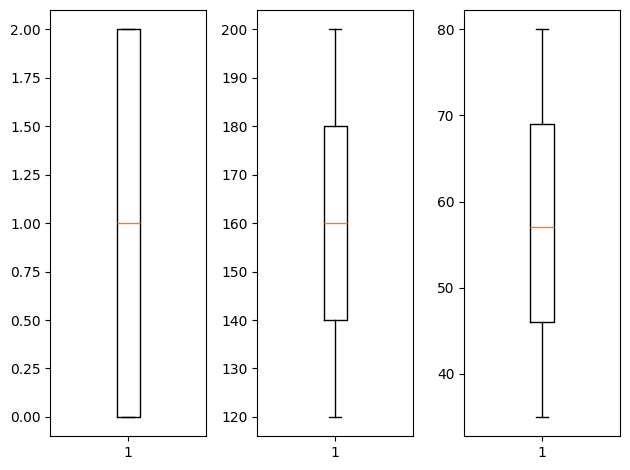

In [3]:
# 데이터 전처리 및 feature engineering
# 1. 결측치 처리 => 우리 데이터는 결측치 없음
# 2. 이상치 처리
fig = plt.figure()  # 도화지 준비
ax1 = fig.add_subplot(1, 3, 1)  # 1행 3열 중 첫번째
ax2 = fig.add_subplot(1, 3, 2)  # 1행 3열 중 두번째
ax3 = fig.add_subplot(1, 3, 3)  # 1행 3열 중 세번째

ax1.boxplot(df['label'])
ax2.boxplot(df['height'])
ax3.boxplot(df['weight'])

plt.tight_layout()
plt.show()  # 이상치 없음.

In [4]:
# 정규화를 진행해야 하는데, 데이터 누수 현상을 방지하기 위해
# 3. 데이터 분할부터 합니다.
x_data = df[['height', 'weight']].values
t_data = df['label'].values

# Data Split
from sklearn.model_selection import train_test_split # train, test 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data,
                 t_data,
                 test_size=0.2)

# 4. 학습용 데이터에 대해 정규화를 진행(독립변수만 진행)
from sklearn.preprocessing import MinMaxScaler       # Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)  # 정규화를 할때 필요한 정보를 scaler에게 제공
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [5]:
# Model 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=3,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',  # loss계산시 one-hot 처리하여 비교
              metrics=['accuracy'])  # 성능 평가 기준

# Model 학습
model.fit(x_data_train_norm,
          t_data_train,
          epochs=50,
          verbose=1,
          validation_split=0.2)

Epoch 1/50


C:\Users\404-00\anaconda3\envs\tfenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6174 - loss: 0.9170 - val_accuracy: 0.7984 - val_loss: 0.6104
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8288 - loss: 0.5723 - val_accuracy: 0.8550 - val_loss: 0.4715
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8914 - loss: 0.4466 - val_accuracy: 0.9025 - val_loss: 0.3955
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9285 - loss: 0.3850 - val_accuracy: 0.9422 - val_loss: 0.3453
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9521 - loss: 0.3362 - val_accuracy: 0.9591 - val_loss: 0.3093
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9632 - loss: 0.3016 - val_accuracy: 0.9675 - val_loss: 0.2809
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9716 - loss: 0.2766 - val_accuracy: 0.9722 - val_loss: 0.2586
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9706 - loss: 0.2562 - val_accuracy: 0.9747 - val_

In [6]:
# Model Evaluation
result = model.evaluate(x_data_test_norm, t_data_test)
print('loss:', result[0])
print('accuracy:', result[1])

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9782 - loss: 0.0997
loss: 0.09734702855348587
accuracy: 0.9775000214576721


In [7]:
# Prediction
my_data = np.array([[165, 58]])
my_data_norm = scaler.transform(my_data)  # 정규화
print(my_data_norm)

pred = model.predict(my_data_norm)
print(pred)  # class별 확률값
print(np.argmax(pred))  # 가장 높은 확률값의 label 출력

[[0.5625     0.51111111]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.01591613 0.98143077 0.00265307]]
1
